In [2]:
### Part 2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Data Preperation
df =  pd.read_csv("campaign_data.csv")
df.describe()
dummies = pd.get_dummies(df["Gender"], drop_first=True) 
df = pd.concat([df, dummies], axis = 1)

df.describe()
Y = df['Buy']
X = df.drop('Gender',axis='columns').drop('Buy',axis='columns')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)




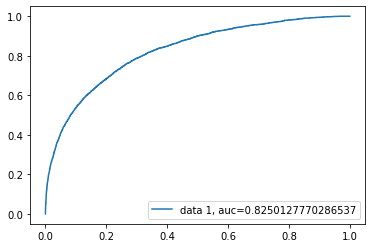

In [3]:
### part 3
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

### Creating new logistic regression model and check it on training data   
logisticModel = LogisticRegression(random_state=0, solver = "lbfgs",max_iter = 1000).fit(X_train, y_train)
y_predict_train = logisticModel.predict_proba(X_train)[:,1]

### Plot of ROC and compute AUC
fpr, tpr, threshold = metrics.roc_curve(y_train, y_predict_train)
auc = metrics.roc_auc_score(y_train, y_predict_train)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()




In [6]:
### part 4
from sklearn.metrics import confusion_matrix
### Compute Expected value based on training data
Vr = 88
Vnr = -12
pr = (-Vnr)/(Vr-Vnr)
y_pred_dummy =[]
for i in range(len(y_predict_train)):
    y_pred_dummy.append(1 if y_predict_train[i] > pr else 0)
    
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred_dummy).ravel()
total = tn + fp + fn + tp

EV = (fp*Vnr + tp*Vr)/ total
print("EV is ",EV)

EV is  3.349485714285714


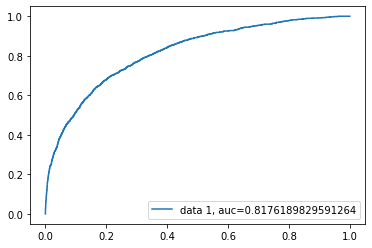

In [7]:
### Part 5
### Prediction of the testing data
logisticModel = LogisticRegression(random_state=0,max_iter = 10000).fit(X_train, y_train)
y_predict = logisticModel.predict_proba(X_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [8]:
###### Compute expected value based on prediction 
Vr = 88
Vnr = -12
pr = (-Vnr)/(Vr-Vnr)
y_pred_dummy_test =[]
for i in range(len(y_predict)):
    y_pred_dummy_test.append(1 if y_predict[i]>pr else 0)
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred_dummy_test).ravel()

total = tn + fp + fn + tp
EV = (fp*Vnr + tp*Vr)/ total
print("EV is ",EV)
#### The result is very close to the training(3.1357 compare to 3.349)

EV is  3.1357333333333335
